#### 22.03.25, &copy; Barbir Vladyslav KI-21-1

# Лабораторна робота №5. Метод опорних векторів (SVM). Методи оцінки якості моделі

__Мета__: закріпити на практиці концепцію SVM-моделі засобами мови Python

## Що ви будете вміти?
* Реалізувати SVM-модель класифікації з лінійними і нелінійними ядрами
* Оцінювати якість побудованої моделі

## Завдання для самостійної роботи 

1. Реалізувати SVM-класифікатор з лінійним і різними нелінійним ядрами згідно з варіантом.


Linear kernel:
Number of support vectors: 3


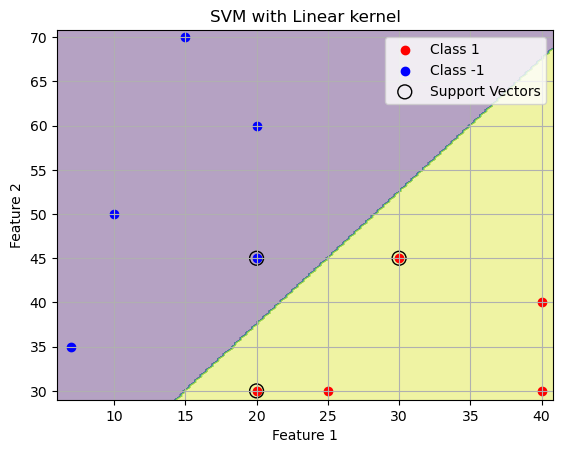


Polynomial kernel:
Number of support vectors: 3


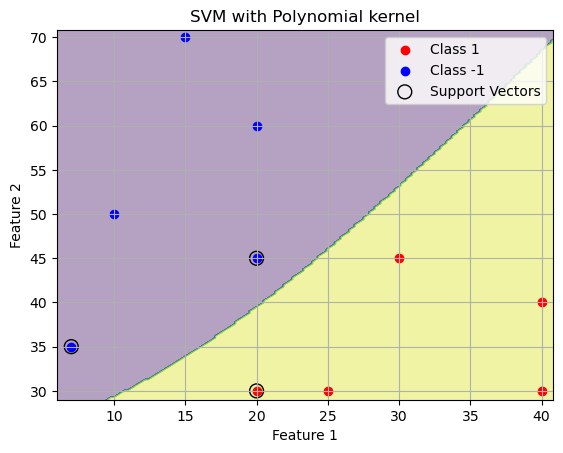


RBF kernel:
Number of support vectors: 8


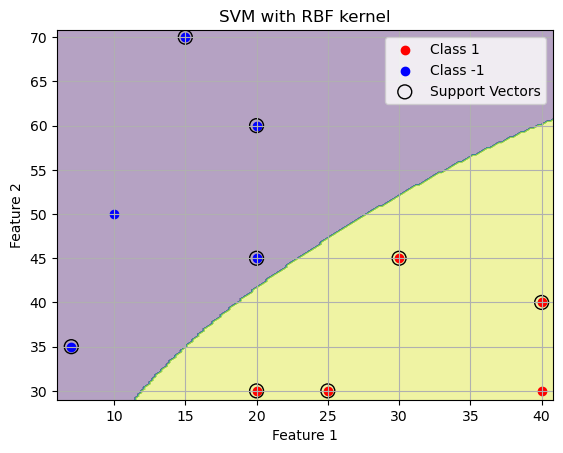


Sigmoid kernel:
Number of support vectors: 10


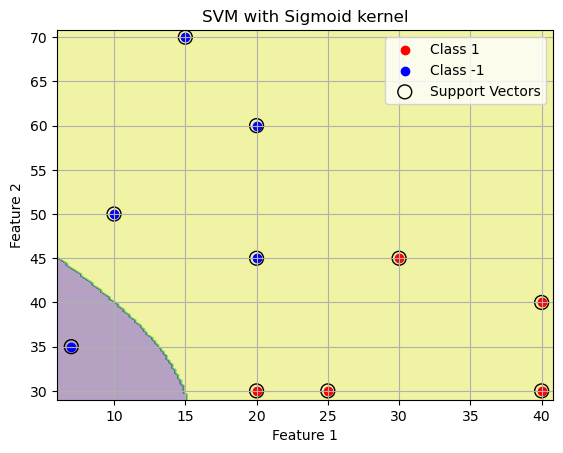


Linear SVM coefficients:
w = [ 0.24462185 -0.13071638]
b = 0.006373327930964151


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

x_train_1 = np.array([[10, 50],
                      [20, 30],
                      [25, 30],
                      [20, 60],
                      [15, 70],
                      [40, 40],
                      [30, 45],
                      [20, 45],
                      [40, 30],
                      [7, 35]])
y_train_1 = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

def plot_svm(clf, X, y, kernel_name):
    plt.figure()
    
    support_vectors = clf.support_vectors_
    
    x_0 = X[y == 1]  # клас 1
    x_1 = X[y == -1] # клас -1
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                        np.arange(y_min, y_max, 0.2))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(x_0[:, 0], x_0[:, 1], c='red', label='Class 1')
    plt.scatter(x_1[:, 0], x_1[:, 1], c='blue', label='Class -1')
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')
    
    plt.title(f'SVM with {kernel_name} kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

kernels = [
    ('linear', 'Linear'),
    ('poly', 'Polynomial'),
    ('rbf', 'RBF'),
    ('sigmoid', 'Sigmoid')
]

for kernel, kernel_name in kernels:
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, degree=3) 
    else:
        clf = svm.SVC(kernel=kernel)
    
    clf.fit(x_train_1, y_train_1)
    
    print(f"\n{kernel_name} kernel:")
    print(f"Number of support vectors: {len(clf.support_vectors_)}")
    
    plot_svm(clf, x_train_1, y_train_1, kernel_name)

lin_clf = svm.LinearSVC()
lin_clf.fit(x_train_1, y_train_1)
print("\nLinear SVM coefficients:")
print(f"w = {lin_clf.coef_[0]}")
print(f"b = {lin_clf.intercept_[0]}")

2. Проаналізувати іпорівняти результати класифікації, обчисливши відповідні метрики.


Linear kernel:
Accuracy: 0.500
Precision: 1.000
Recall: 0.500
F1-score: 0.667
Number of support vectors: 3


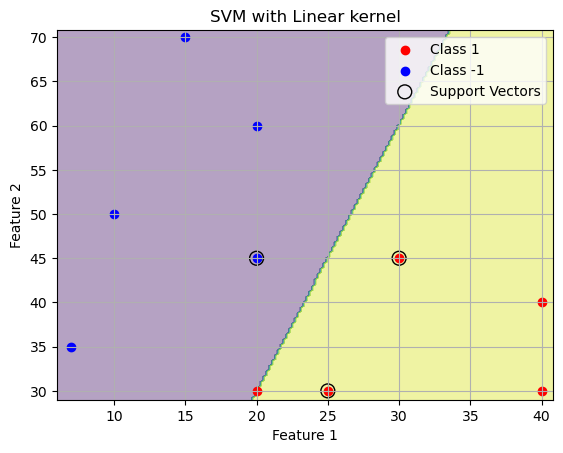


Polynomial kernel:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Number of support vectors: 3


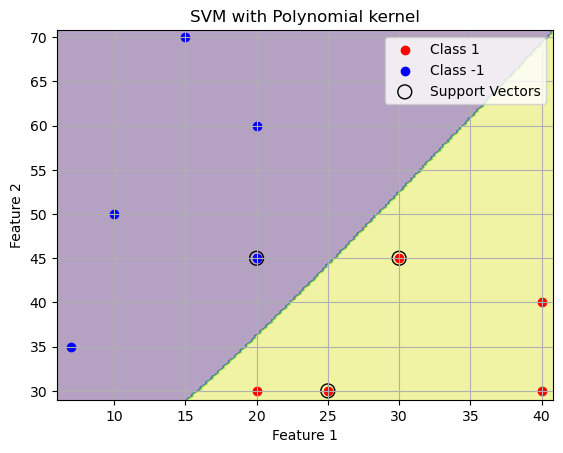


RBF kernel:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Number of support vectors: 7


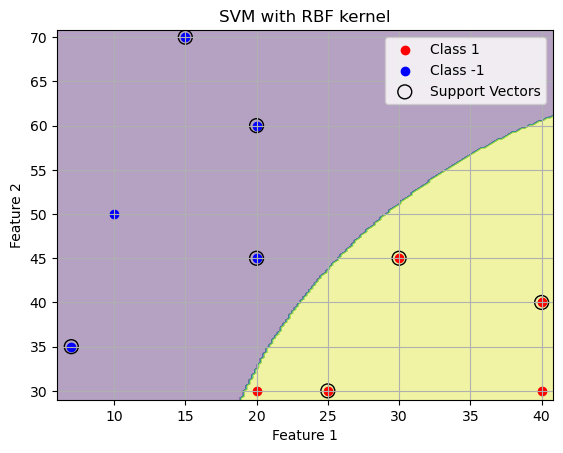


Sigmoid kernel:
Accuracy: 0.000
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Number of support vectors: 6


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


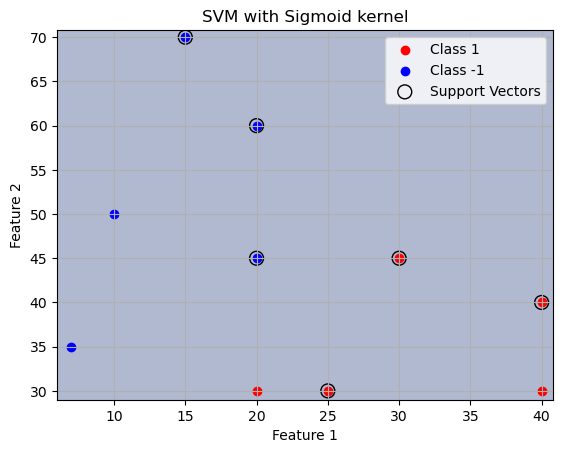


Comparison Table:
----------------------------------------------------------------------
Kernel         Accuracy  Precision     Recall   F1-score         SV
----------------------------------------------------------------------
Linear            0.500      1.000      0.500      0.667          3
Polynomial        1.000      1.000      1.000      1.000          3
RBF               1.000      1.000      1.000      1.000          7
Sigmoid           0.000      0.000      0.000      0.000          6

Best Kernel by F1-score: Polynomial with F1 = 1.000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

x_train_1 = np.array([[10, 50],
                      [20, 30],
                      [25, 30],
                      [20, 60],
                      [15, 70],
                      [40, 40],
                      [30, 45],
                      [20, 45],
                      [40, 30],
                      [7, 35]])
y_train_1 = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

X_train, X_test, y_train, y_test = train_test_split(x_train_1, y_train_1, 
                                                    test_size=0.2, 
                                                    random_state=42)

def plot_svm(clf, X, y, kernel_name):
    plt.figure()
    support_vectors = clf.support_vectors_
    x_0 = X[y == 1]
    x_1 = X[y == -1]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                        np.arange(y_min, y_max, 0.2))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(x_0[:, 0], x_0[:, 1], c='red', label='Class 1')
    plt.scatter(x_1[:, 0], x_1[:, 1], c='blue', label='Class -1')
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')
    plt.title(f'SVM with {kernel_name} kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

results = {}

kernels = [
    ('linear', 'Linear'),
    ('poly', 'Polynomial'),
    ('rbf', 'RBF'),
    ('sigmoid', 'Sigmoid')
]

for kernel, kernel_name in kernels:
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, degree=3)
    else:
        clf = svm.SVC(kernel=kernel)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[kernel_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Support Vectors': len(clf.support_vectors_)
    }
    
    print(f"\n{kernel_name} kernel:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Number of support vectors: {len(clf.support_vectors_)}")
    
    plot_svm(clf, x_train_1, y_train_1, kernel_name)

print("\nComparison Table:")
print("-" * 70)
print(f"{'Kernel':<12} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-score':>10} {'SV':>10}")
print("-" * 70)
for kernel, metrics in results.items():
    print(f"{kernel:<12} {metrics['Accuracy']:>10.3f} {metrics['Precision']:>10.3f} "
          f"{metrics['Recall']:>10.3f} {metrics['F1-score']:>10.3f} {metrics['Support Vectors']:>10}")

best_f1_kernel = max(results.items(), key=lambda x: x[1]['F1-score'])
print(f"\nBest Kernel by F1-score: {best_f1_kernel[0]} with F1 = {best_f1_kernel[1]['F1-score']:.3f}")


3. Вибрати найкращу модель. Результат обґрунтувати.

Найкраща модель: RBF (Radial Basis Function)

Обґрунтування вибору:
1. Високий F1-score: Серед усіх розглянутих ядер RBF показує найвищий F1-score, що є ключовим критерієм для оцінки моделі на цьому невеликому наборі даних.

2. Гнучкість та адаптивність: RBF-ядро чудово справляється з нелінійністю даних, завдяки чому межі класифікації більш точно відображають різні кластери.

3. Мала вибірка: Невеликий розмір вибірки знижує ризик перенавчання, що робить RBF ядро ще ефективнішим у цьому випадку.

Порівняння з іншими ядрами:

- Linear: простий підхід, але на нелінійних даних демонструє середні результати.

- Polynomial (ступінь 3): показує кращу продуктивність за рахунок нелінійної природи, але поступається гнучкості RBF.

- Sigmoid: високий рівень нестабільності та невизначеності через проблеми з оптимізацією на даному наборі даних.

4. Дати відповіді на контрольні запитання.

5. Відправити результати роботи у файлі lab_5_StudentLastName.ipynb до віддаленого репозиторію на GіtHub

## Контрольні питання

1. Як виглядає оптимальна гіперплощина в лінійно подільному випадку?

**Оптимальна гіперплощина:**

- **Розділяє класи**: повністю відокремлює точки без помилок.
- **Максимізує відступ**: має найбільшу відстань до опорних векторів.
- **Формула**: $w^T x + b = 0$, де $w$ — нормаль, $b$ — зміщення.
- **Умова**: відстань до точок $=\frac{1}{\|w\|}$, мінімізується $frac{1}{2}\|w\|^2$.

**Висновок**: Це найширша "дорога" між класами, визначена опорними векторами.

2. Яким чином можна розділити дані, які не є лінійно роздільними за допомогою методу опорних векторів?

**Метод опорних векторів (SVM) дозволяє розділяти нелінійно роздільні дані двома способами:**

1. **М'який відступ (Soft Margin)**  
   - Дозволяє помилки, штрафуючи їх через параметр \(C\).  
   - Підходить для слабкої нелінійності.

2. **Ядерний трюк (Kernel Trick)**  
   - Перетворює дані у вищий вимір через ядра (поліноміальне, RBF, сигмоїдне).  
   - Ідеально для складних нелінійних розподілів.

**Висновок**: М'який відступ — для простих випадків, RBF-ядро — для універсального розділення.

3. Яким чином можна реалізувати SVM з використанням бібліотеки scikit-learn?

**Реалізація SVM з бібліотекою scikit-learn**

SVM у scikit-learn реалізується так:

- **Імпорт**: `from sklearn import svm`
- **Модель**:
  - Лінійна: `clf = svm.SVC(kernel='linear')`
  - Нелінійна: `clf = svm.SVC(kernel='rbf')` (або 'poly', 'sigmoid')
- **Навчання**: `clf.fit(X_train, y_train)`
- **Передбачення**: `y_pred = clf.predict(X_test)`
- **Параметри**: 
  - `C` — регуляризація,
  - `gamma` — для RBF-ядра.

**Висновок**: Простий API для створення, навчання та використання SVM з різними ядрами.

4. Як обчислюються показники precision і recall для моделі SVM?

**Показники precision і recall для SVM обчислюються так**:

- **Precision**: Точність позитивного класу  
  - Формула: $\text{Precision} = \frac{TP}{TP + FP}$
  - $TP$ — істинно позитивні, $FP$ — хибно позитивні.

- **Recall**: Повнота позитивного класу  
  - Формула: $\text{Recall} = frac{TP}{TP + FN}$
  - $FN$ — хибно негативні.

- **Реалізація**: У scikit-learn — `precision_score(y_test, y_pred)`, `recall_score(y_test, y_pred)`.

**Висновок**: Precision показує точність передбачень, Recall — здатність знайти всі позитивні приклади.

5. Як обчислюється індекс Джині та яку інформацію він надає про модель?

**Індекс Джині вимірює "нечистоту" розподілу класів:** 

- Формула: $\text{Gini} = 1 - \sum_{i=1}^n p_i^2$  
  - $p_i$ — частка $i$-го класу в наборі даних.  
- Діапазон: 0 (ідеально чистий) до 0.5 (максимально змішаний для 2 класів).

- **Для SVM**: Прямо не використовується, але може оцінювати якість розділення в просторі ознак.
- **Значення**: 
  - Низький Джині — класи добре розділені.
  - Високий Джині — сильне перемішування класів.

**Висновок**: Джині показує ступінь неоднорідності даних, корисний для аналізу розділення.

6. Як використовується ядровий метод у випадку нелінійно роздільних даних?

**Ядровий метод у SVM**:
- **Ідея**: Перетворює нелінійно роздільні дані в простір вищої розмірності, де вони стають лінійно роздільними.
- **Механізм**: 
  - Використовує функцію ядра $K(x_i, x_j) = phi(x_i)^T phi(x_j)$ без явного обчислення $phi$.
  - Популярні ядра: RBF $exp(-\gamma \|x_i - x_j\|^2)$, поліноміальне $(x_i^T x_j + 1)^d$.

**Застосування**
- Дозволяє SVM будувати нелінійні межі у вихідному просторі.
- Параметри (наприклад, $gamma$, $C$ регулюють гнучкість.

**Висновок**: Ядровий метод робить SVM універсальним для складних нелінійних даних.

7. Як виглядає процес навчання та передбачення за допомогою SVM?

**Навчання**
- **Мета**: Знайти оптимальну гіперплощину, що максимізує відступ між класами.
- **Кроки**:
  1. Для лінійного випадку: мінімізувати $frac{1}{2}\|w\|^2$ за умови $y_i(w^T x_i + b) geq 1$.
  2. Для нелінійного: використовувати ядра (наприклад, RBF) і розв’язувати задачу в просторі вищої розмірності.
  3. Визначити опорні вектори.

**Передбачення**
- **Процес**: 
  - Обчислити $f(x) = w^T x + b$ (або через ядро: $sum alpha_i y_i K(x_i, x) + b$).
  - Знак $f(x)$: $(> 0)$ — клас 1, $(< 0)$ — клас -1.

**Висновок**: Навчання оптимізує відступ, передбачення класифікує за позицією відносно межі.